In [1]:
import pandas as pd
import sklearn

In [33]:
train = pd.read_csv('../data/fashion-mnist_train.csv')

In [36]:
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [41]:
Y = train['label']#.astype('category')
# convert labels to categorical
# Y = Y.map(label_dict)
X = train.drop(columns=['label'])

In [42]:
Y

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

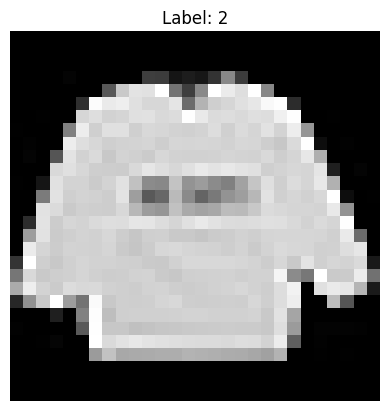

In [43]:
# visualize the first image
import matplotlib.pyplot as plt
plt.imshow(X.iloc[0].values.reshape(28, 28), cmap='gray')
plt.title(f'Label: {Y.iloc[0]}')
plt.axis('off')
plt.show()


In [44]:
# Create a function that visualize a high dimensional dataset using t-SNE
from sklearn.manifold import TSNE

def visualize_tsne(X, Y, perplexity=30, n_iter=1000):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter, label='Label')
    plt.title('t-SNE Visualization of Fashion MNIST')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

In [49]:
# create a function that visualize a high dimensional dataset using UMAP, note that label is categorical
import umap
import matplotlib.patches as mpatches

def visualize_umap(X, Y, n_neighbors=15, min_dist=0.1):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2)
    X_umap = reducer.fit_transform(X)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=Y, cmap='tab10', alpha=0.5)
    # Create legend with category names
    handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=label_dict[i]) for i in range(10)]
    plt.legend(handles=handles, title="Category")
    # plt.colorbar(scatter, label='Label')
    plt.title('UMAP Visualization of Fashion MNIST')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.show()


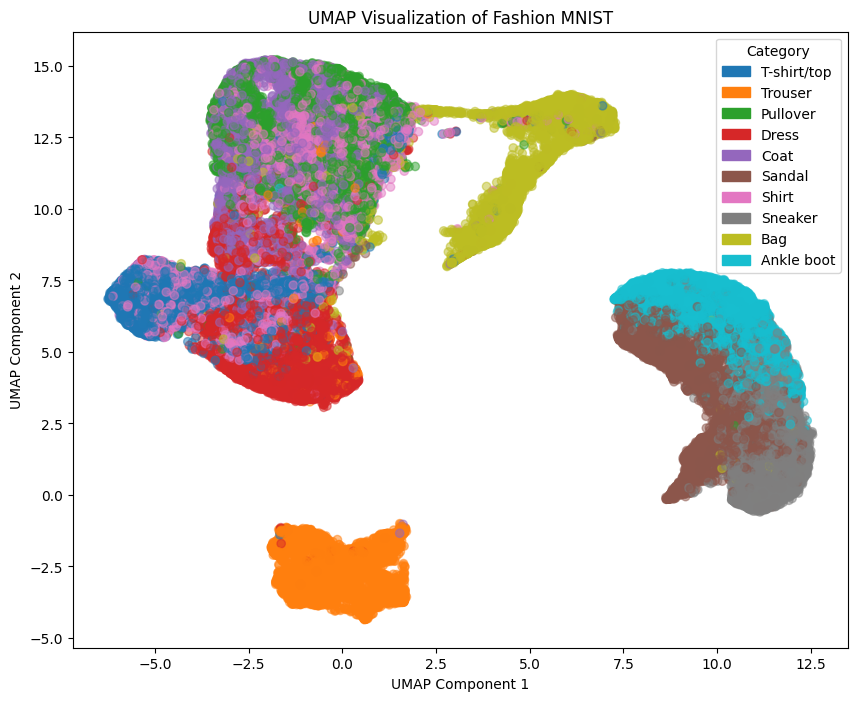

In [55]:
# visualize raw data using UMAP
visualize_umap(X, Y)

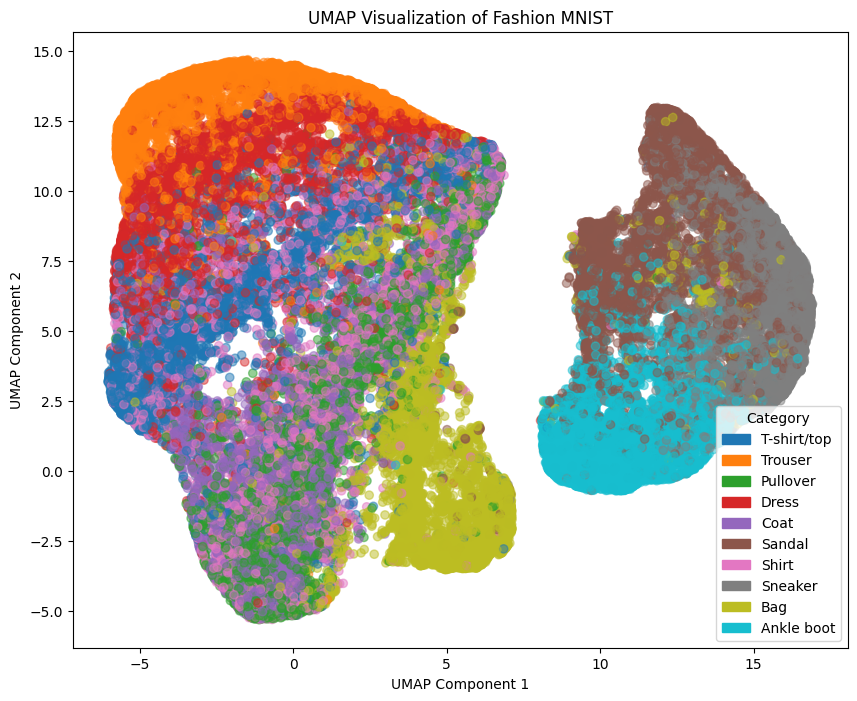

In [50]:
# Run PCA and visualize the first 2 components with labels using TSNE
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
# Visualize the first 2 components using t-SNE
visualize_umap(X_pca, Y)


In [51]:
# Reduce the dimension using Wavelet transform and visualize the first 2 components
import pywt
def wavelet_transform(X, wavelet='haar', level=1):
    coeffs = []
    for i in range(len(X)):
        coeff = pywt.wavedec(X.iloc[i].values.reshape(28, 28), wavelet, level=level)
        coeffs.append(coeff[0].flatten())  # Use the approximation coefficients
    return pd.DataFrame(coeffs)

X_wavelet = wavelet_transform(X)


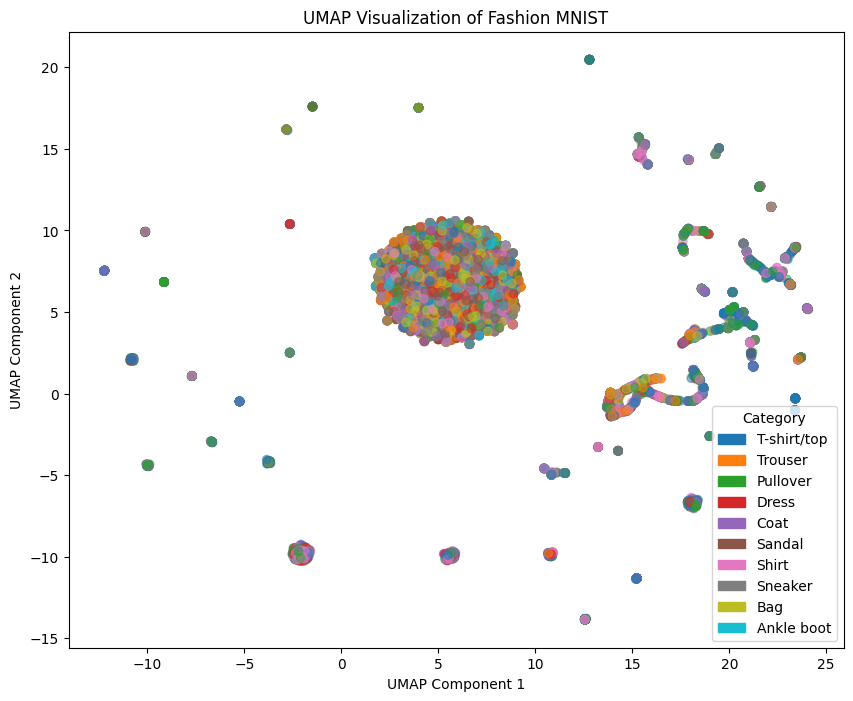

In [54]:
# Select the first 2 components from the wavelet transformed data
X_wavelet_reduced = X_wavelet.iloc[:, :4]
# Visualize the first 2 components using the labels
visualize_umap(X_wavelet_reduced, Y)
